In [294]:
# initialise
import numpy as np
import matplotlib.pyplot as plt

# HDB Resale Flat Prices

Data for this analysis was obtained from [here](https://data.gov.sg/dataset/resale-flat-prices).

The data set consists of transacted resale flat prices from the years 1990 to present (8 December 2022).

According to the data.gov website, prior to March 2012, data is based on date of approval for the resale transactions. For March 2012 onwards, the data is based on date of registration for the resale transactions.

Furthermore, data from 2015 onwards includes a column named `remaining_lease`, which indicates the remaining years of lease for the houses in the datasets.

For ease of analyses, I will limit my analyses to the years from 2015, which would already include at least 7 years of data and encompass several global and local events impacting the HDB resale market.

In [295]:
# import dataset

f1 = '/Users/iylia/Library/Mobile Documents/com~apple~CloudDocs/SP/Intro to Programming for DS/CA1/Data/Resale Flat Prices/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv'
f2 = '/Users/iylia/Library/Mobile Documents/com~apple~CloudDocs/SP/Intro to Programming for DS/CA1/Data/Resale Flat Prices/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv'

d1 = np.loadtxt(f1,
                delimiter=',',
                skiprows=1,
                usecols=(0,1,2,5,6,8,9,10),
                dtype=[('month', 'U50'),
                        ('town', 'U50'),
                        ('flat_type', 'U50'),
                        ('storey_range', 'U50'),
                        ('floor_area_sqm', 'f8'),
                        ('lease_commence_date', 'i8'),
                        ('remaining_lease', 'i8'),
                        ('resale_price', 'f8')],
               )

d2 = np.loadtxt(f2,
                delimiter=',',
                skiprows=1,
                usecols=(0,1,2,5,6,8,9,10),
                dtype=[('month', 'U50'),
                        ('town', 'U50'),
                        ('flat_type', 'U50'),
                        ('storey_range', 'U50'),
                        ('floor_area_sqm', 'f8'),
                        ('lease_commence_date', 'i8'),
                        ('remaining_lease', 'U50'),
                        ('resale_price', 'f8')],
               )

# change remaining_lease column in d2 to be integer of years without months
years = [i for i,j in np.char.split(d2['remaining_lease'],sep=' years')] # create list of years from split array string where i is the year, j is the rest of the string

d2['remaining_lease'] = np.array(years) # replace the remaining lease column in d2 to be integer of years without months

# stack d1 and d2 into combined dataset
d = np.hstack((d1,d2))

# convert storey_range into categorical levels of low/mid/high
storeys = []
for i in d['storey_range']:
    if i in ("01 TO 03", "01 TO 05", "04 TO 06"):
        storeys.append("low")
    elif i in ("06 TO 10", "07 TO 09"):
        storeys.append("mid")
    else:
        storeys.append("high")

d['storey_range'] = np.array(storeys, dtype='U50')

# view first 10 rows of full dataset
print('View the first 10 rows of the full dataset')
print()
print(d[:10])
print()

# simple text analysis
print('{:*^24}'.format('Resale Flat Prices'))
print()
print(f'There are {len(d)} rows and 8 columns in this dataset')
print()
print(f'The names of the columns are:')
print(f'- month <class {d.dtype[0]}> isnumeric: {np.unique(np.char.isnumeric(d["month"]))}')
print(f'- town <class {d.dtype[1]}> isnumeric: {np.unique(np.char.isnumeric(d["town"]))}')
print(f'- flat_type <class {d.dtype[2]}> isnumeric: {np.unique(np.char.isnumeric(d["flat_type"]))}')
print(f'- storey_range <class {d.dtype[3]}> isnumeric: {np.unique(np.char.isnumeric(d["storey_range"]))}')
print(f'- floor_area_sqm <class {d.dtype[4]}>')
print(f'- lease_commence_date <class {d.dtype[5]}>')
print(f'- remaining_lease <class {d.dtype[6]}> isnumeric: {np.unique(np.char.isnumeric(d["remaining_lease"]))}')
print(f'- resale_price <class {d.dtype[7]}>')
print()
print(f'{len(np.unique(d["month"]))} unique values in month column')
print(f'{len(np.unique(d["town"]))} unique values in town column')
print(f'{len(np.unique(d["flat_type"]))} unique values in flat_type column')
print(f'{len(np.unique(d["storey_range"]))} unique values in storey_range column')
print(f'{len(np.unique(d["floor_area_sqm"]))} unique values in floor_area_sqm column')
print(f'{len(np.unique(d["lease_commence_date"]))} unique values in lease_commence_date column')
print(f'{len(np.unique(d["remaining_lease"]))} unique values in remaining_lease column')
print(f'{len(np.unique(d["resale_price"]))} unique values in resale_price column')


View the first 10 rows of the full dataset

[('2015-01', 'ANG MO KIO', '3 ROOM', 'mid', 60., 1986, '70', 255000.)
 ('2015-01', 'ANG MO KIO', '3 ROOM', 'low', 68., 1981, '65', 275000.)
 ('2015-01', 'ANG MO KIO', '3 ROOM', 'low', 69., 1980, '64', 285000.)
 ('2015-01', 'ANG MO KIO', '3 ROOM', 'low', 68., 1979, '63', 290000.)
 ('2015-01', 'ANG MO KIO', '3 ROOM', 'mid', 68., 1980, '64', 290000.)
 ('2015-01', 'ANG MO KIO', '3 ROOM', 'mid', 67., 1980, '64', 290000.)
 ('2015-01', 'ANG MO KIO', '3 ROOM', 'low', 68., 1980, '64', 290000.)
 ('2015-01', 'ANG MO KIO', '3 ROOM', 'low', 68., 1981, '65', 293000.)
 ('2015-01', 'ANG MO KIO', '3 ROOM', 'low', 67., 1978, '62', 300000.)
 ('2015-01', 'ANG MO KIO', '3 ROOM', 'high', 68., 1985, '69', 307500.)]

***Resale Flat Prices***

There are 178825 rows and 8 columns in this dataset

The names of the columns are:
- month <class <U50> isnumeric: [False]
- town <class <U50> isnumeric: [False]
- flat_type <class <U50> isnumeric: [False]
- storey_range <class

## Exploratory Data Analysis

Now that the dataset has been imported and combined, with the data types known, we can do some quick exploratory analyses.

First, we know that generally, HDB flat prices tend to vary by flat types. We can visualise this in a boxplot:

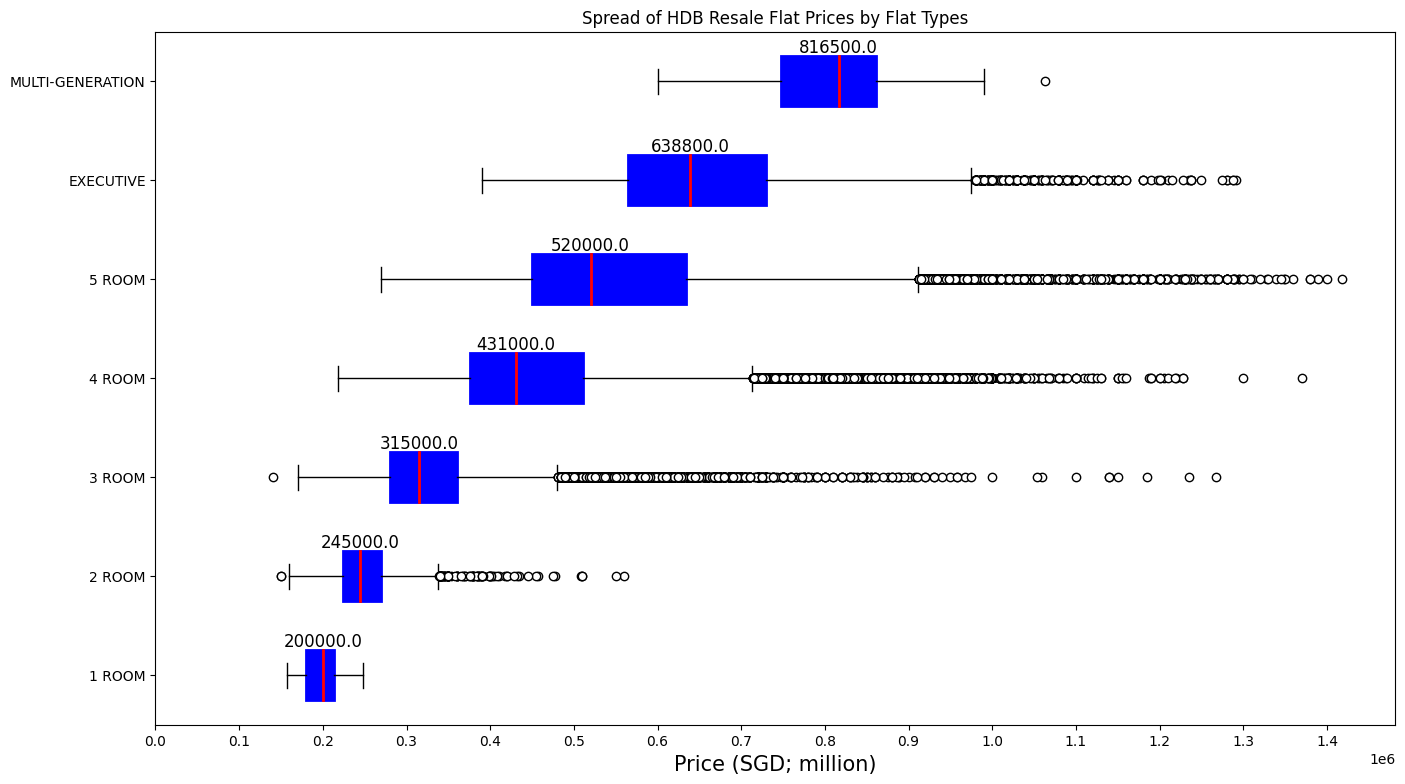

In [337]:
# get unique labels for flat type
labels = list(set(d['flat_type']))
labels.sort()
types = np.arange(0,len(labels))
types_prices = d[['flat_type', 'resale_price']]

# create array for boxplot
prices = types_prices['resale_price']

prices_1room = prices[types_prices['flat_type'] == '1 ROOM']
prices_2room = prices[types_prices['flat_type'] == '2 ROOM']
prices_3room = prices[types_prices['flat_type'] == '3 ROOM']
prices_4room = prices[types_prices['flat_type'] == '4 ROOM']
prices_5room = prices[types_prices['flat_type'] == '5 ROOM']
prices_exec = prices[types_prices['flat_type'] == 'EXECUTIVE']
prices_multi = prices[types_prices['flat_type'] == 'MULTI-GENERATION']

prices_combined = [prices_1room,prices_2room,prices_3room,prices_4room,prices_5room,prices_exec,prices_multi]

# plot
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()

bp_dict = ax.boxplot(prices_combined,
            labels=labels,
            patch_artist=True,
            medianprops={"color": "red", "linewidth": 2},
            boxprops={"facecolor": "blue", "color": "blue",
                          "linewidth": 2},
            flierprops={"markerfacecolor": "white"},
            vert=False)

ax.set_title('Spread of HDB Resale Flat Prices by Flat Types')
ax.set_xlabel('Price (SGD; million)',fontsize=15)
ax.set_xticks(np.arange(0,1500000,100000))

for line in bp_dict['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    plt.text(x, y, '%.1f' % x,
         verticalalignment='bottom',horizontalalignment='center',fontsize=12) # draw above median line, centered

plt.show()

In [ ]:
# %reset